#Name- Yayati Raghav and Tarun Kumar
#Roll No.-2201330100296 and 2201330100269
##Project link:-#https://heartdisease-yayatiraghav-tarunkumar.streamlit.app/
##Github link:-#https://github.com/YayatiRaghav/HeartDisease

###Problem Statement:- Analysis on a Healthcare dataset related to the Heart Disease to Predict whether there is chances of heart disease or not using Simple Linear Logistic Regression Algorithm.



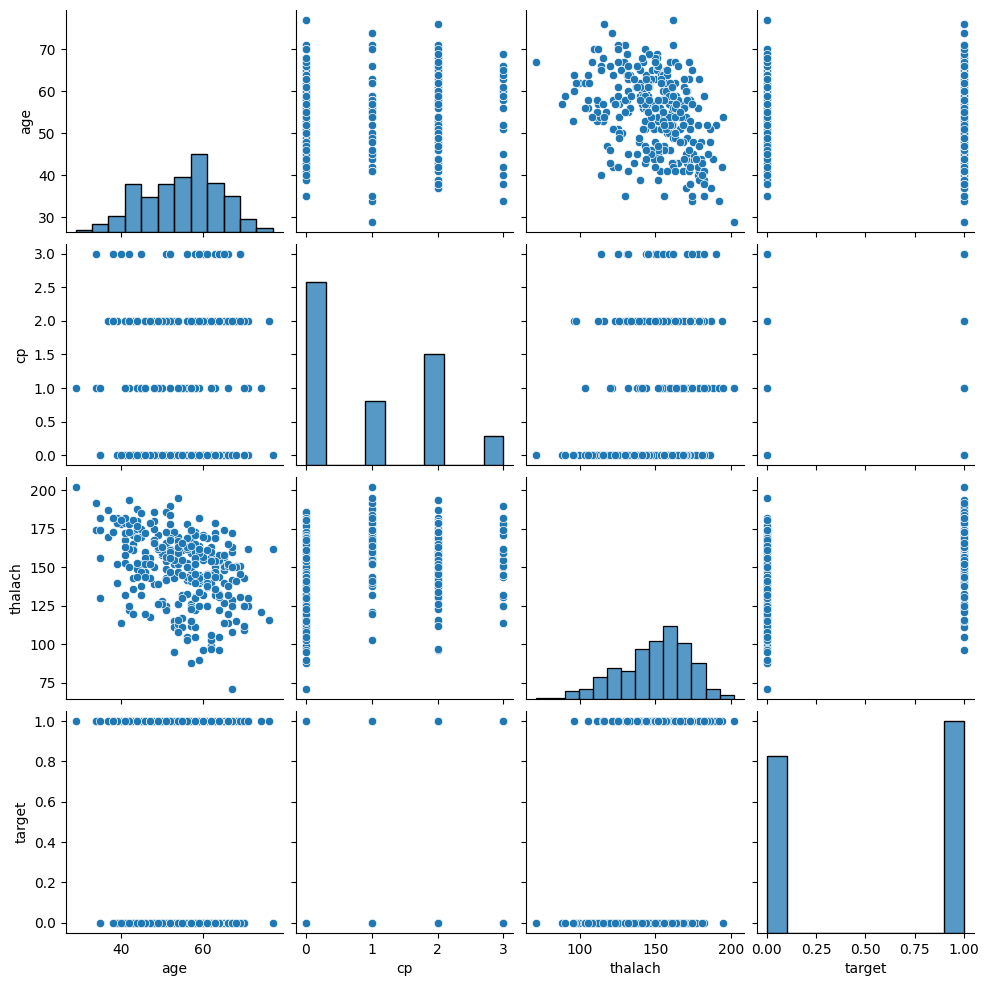

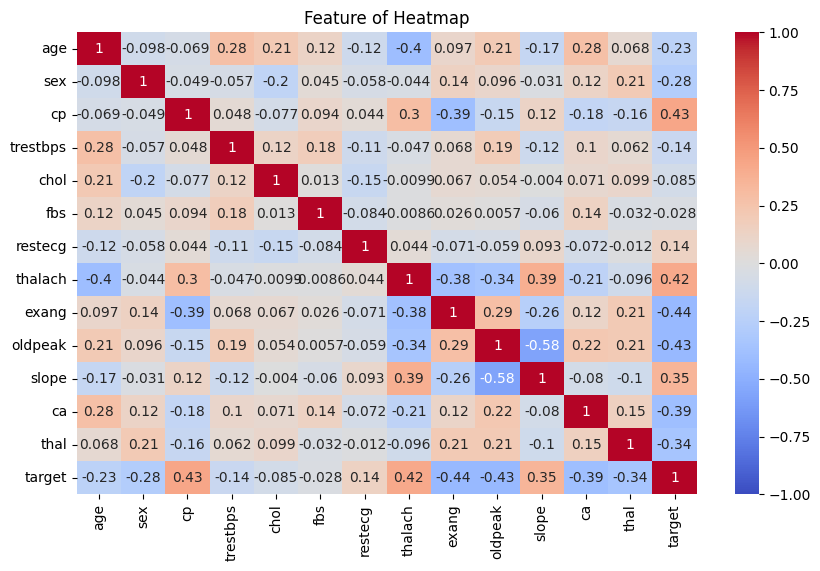

[0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0]
Accuracy : 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Enter age: 15
Enter chest pain type (0-3): 3
Enter maximum heart rate achieved: 140
Prediction: Heart Disease Present


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

df=pd.read_csv('/content/heart_disease.csv')
df.head()

df.describe()

sns.pairplot(df[['age','cp','thalach','target']])
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Feature of Heatmap')
plt.show()

#feature and target selection
X=df[['age','cp','thalach']]
y=df['target']

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[: , 1]
print(y_pred)

print(f"Accuracy : {accuracy_score(y_test,y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test,y_pred))

# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

predict_heart_disease()


In [ ]:
import joblib
# Save model
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']